In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("공공보건의료기관현황.csv", index_col = 0, encoding="utf-8-sig")
print(data.columns)
data.head() # 상위 5개 

Index(['병원 명', '설립형태', '근거 법령', '관계 행정기관', '관계 공공단체', '심평원 요양기관번호', '종별구분',
       '병상수', '소재지 우편번호', '주소', '홈페이지', '대표전화', 'FAX', '비고'],
      dtype='object')


,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [3]:
data["주소"].head()

연번
1        강원도 춘천시 충열로 142번길 24-16
2               강원도 삼척시 오십천로 418
3            강원도 영월군 영월읍 중앙1로 59
4          강원도 원주시 서원대로 387(개운동)
5    강원도 강릉시 경강로 2007(남문동 164-1)
Name: 주소, dtype: object

OO도 OO시만 필요함

In [4]:
addr = pd.DataFrame(data["주소"])
addr = addr["주소"].apply(lambda v : v.split()[:2])
print(addr)
addr = pd.DataFrame(addr.tolist(), columns=("시도", "군구"))
addr.head()

연번
1       [강원도, 춘천시]
2       [강원도, 삼척시]
3       [강원도, 영월군]
4       [강원도, 원주시]
5       [강원도, 강릉시]
          ...     
216    [충청북도, 제천시]
217    [충청북도, 충주시]
218    [충청북도, 충주시]
219    [충청북도, 영동군]
220    [충청북도, 단양군]
Name: 주소, Length: 227, dtype: object


,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


In [5]:
addr["시도"].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

시도 부분에 경기와 경기도를 통일 시키고 경산시 대전시가 여기 있으면 안됨

In [6]:
# 표준 행정 구역 이름으로 수정 
addr_aliases =	{'경기':'경기도',	'경남':'경상남도',	'경북':'경상북도',	'충북':'충청북도',	
'서울시':'서울특별시',	'부산특별시':'부산광역시',	'대전시':'대전광역시',	'충남':'충청남도',	
'전남':'전라남도',	'전북':'전라북도'}

addr['시도']=addr['시도'].apply(lambda v: addr_aliases.get(v, v))

In [7]:
addr["시도"].unique()

array(['강원도', '경기도', '경상남도', '창원시', '경상북도', '경산시', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도',
       '서울특별시', '충청남도', '울산광역시', '천안시'], dtype=object)

경산시 천안시 창원시 데이터 수정 

In [8]:
addr[addr['시도']=='창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [9]:
addr.iloc[27] = ["경상남도", "창원시"]
addr.iloc[31] = ["경상남도", "창원시"]

In [10]:
addr[addr['시도']=='경산시']

,시도,군구
47,경산시,경안로


In [11]:
addr.iloc[47] = ["경상북도", "경산시"]

In [12]:
addr[addr['시도']=='천안시']

,시도,군구
209,천안시,동남구
210,천안시,동남구


In [13]:
addr.iloc[209] = ["충청남도", "천안시"]
addr.iloc[210] = ["충청남도", "천안시"]

In [14]:
addr["시도"].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

군구도 데이터를 수정하자

In [15]:
addr["군구"].unique() # 아란 13길 -> 제주특별자치도, 제주시

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [16]:
addr[addr['군구']=='아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [17]:
addr.iloc[75] = ["제주특별자치도", "제주시"]

"시도"와 "군구" 컬럼을 합친 새로운 컬럼(["시도군구"]) 추가

In [18]:
addr["시도군구"] = addr.apply(lambda r:r["시도"] + " " +r["군구"], axis=1)
addr.head()

,시도,군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [19]:
addr["의료기관수"] = 0
addr.head()

,시도,군구,시도군구,의료기관수
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0


In [20]:
addr_group = pd.DataFrame(addr.groupby(['시도',	'군구',	'시도군구'],	as_index=False).count())
addr_group.head()

,시도,군구,시도군구,의료기관수
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


In [21]:
addr_group = addr_group.set_index("시도군구")

addr_group.head()

,시도,군구,의료기관수
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


## 행정구역별 인구 데이터 준비

In [30]:
population = pd.read_excel('행정구역시군구별성별인구수.xlsx',	
sheet_name='데이터', header=[0])
population.head()

,행정구역(시도)별1,행정구역(시군구)별2,총인구수 (명)
0,전국,소계,51325329
1,서울특별시,소계,9386034
2,서울특별시,종로구,139417
3,서울특별시,중구,121312
4,서울특별시,용산구,213151


In [31]:
# 나중에 데이터 합칠 때를 대비하여 header 변경
population = population.rename(columns={"행정구역(시도)별1":"시도",
                                       "행정구역(시군구)별2":"군구"})

In [32]:
population.head()

,시도,군구,총인구수 (명)
0,전국,소계,51325329
1,서울특별시,소계,9386034
2,서울특별시,종로구,139417
3,서울특별시,중구,121312
4,서울특별시,용산구,213151


In [34]:
row_count = population.shape[0]

for index in range(row_count):
    population.loc[index, "군구"] = population["군구"][index].strip()

In [36]:
population["시도군구"] = population.apply(lambda r:r["시도"]+" "+r["군구"], axis=1)

In [37]:
population.head()

,시도,군구,총인구수 (명),시도군구
0,전국,소계,51325329,전국 소계
1,서울특별시,소계,9386034,서울특별시 소계
2,서울특별시,종로구,139417,서울특별시 종로구
3,서울특별시,중구,121312,서울특별시 중구
4,서울특별시,용산구,213151,서울특별시 용산구


In [40]:
# 군구에 "소계"항목 제거 
population = population[population["군구"] != "소계"]
population.head()

,시도,군구,총인구수 (명),시도군구
2,서울특별시,종로구,139417,서울특별시 종로구
3,서울특별시,중구,121312,서울특별시 중구
4,서울특별시,용산구,213151,서울특별시 용산구
5,서울특별시,성동구,277361,서울특별시 성동구
6,서울특별시,광진구,335554,서울특별시 광진구


In [41]:
population = population.set_index("시도군구")
population.head()

,시도,군구,총인구수 (명)
시도군구,,,
서울특별시 종로구,서울특별시,종로구,139417
서울특별시 중구,서울특별시,중구,121312
서울특별시 용산구,서울특별시,용산구,213151
서울특별시 성동구,서울특별시,성동구,277361
서울특별시 광진구,서울특별시,광진구,335554


In [43]:
addr_population_merge = pd.merge(addr_group, population, how='inner', left_on=None, right_on=None, left_index=True,	right_index=True)
addr_population_merge

,시도_x,군구_x,의료기관수,시도_y,군구_y,총인구수 (명)
시도군구,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,209439
강원도 동해시,강원도,동해시,1,강원도,동해시,88625
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,62651
강원도 속초시,강원도,속초시,1,강원도,속초시,82054
강원도 양구군,강원도,양구군,1,강원도,양구군,21056
...,...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,충청북도,단양군,27701
충청북도 영동군,충청북도,영동군,1,충청북도,영동군,44195
충청북도 제천시,충청북도,제천시,1,충청북도,제천시,130194


In [46]:
addr_population_merge.columns

Index(['시도_x', '군구_x', '의료기관수', '시도_y', '군구_y', '총인구수 (명)'], dtype='object')

[‘시도_x’],	[‘군구_x’],	[‘의료기관수’],	[‘총인구수 (명)’]

In [47]:
local_medicalcenter_population = addr_population_merge[['시도_x', '군구_x', '의료기관수', '총인구수 (명)']]

In [48]:
local_medicalcenter_population = local_medicalcenter_population.rename(columns={'시도_x':"시도", '군구_x':"군구", '의료기관수':"공공의료기관수", '총인구수 (명)':"인구수"})
local_medicalcenter_population.head()

,시도,군구,공공의료기관수,인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,209439
강원도 동해시,강원도,동해시,1,88625
강원도 삼척시,강원도,삼척시,1,62651
강원도 속초시,강원도,속초시,1,82054
강원도 양구군,강원도,양구군,1,21056


In [50]:
mc_count = local_medicalcenter_population["공공의료기관수"]

# 연산하여 새로운 컬럼 추가
local_medicalcenter_population["인구대비의료기관비율"] = mc_count.div(local_medicalcenter_population["인구수"], axis=0) * 1000

local_medicalcenter_population.head()

,시도,군구,공공의료기관수,인구수,인구대비의료기관비율
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,209439,0.019099
강원도 동해시,강원도,동해시,1,88625,0.011283
강원도 삼척시,강원도,삼척시,1,62651,0.015961
강원도 속초시,강원도,속초시,1,82054,0.012187
강원도 양구군,강원도,양구군,1,21056,0.047492


In [51]:
import matplotlib.pyplot as plt
import platform
import koreanize_matplotlib

<Axes: xlabel='시도군구'>

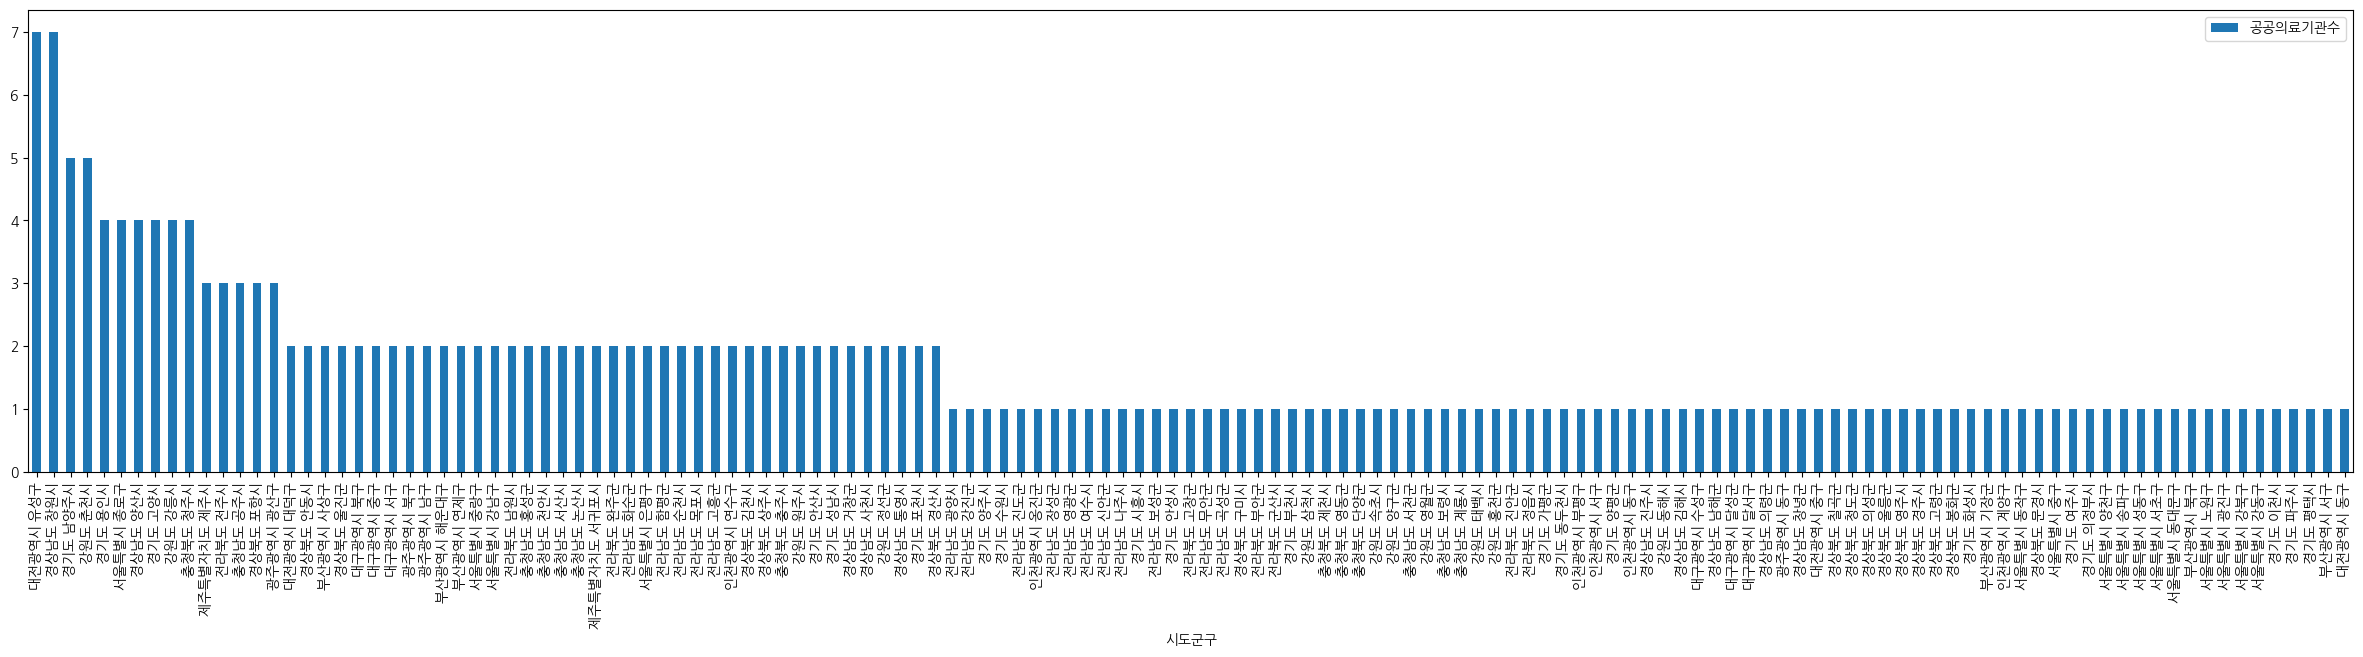

In [54]:
mc_ratio = local_medicalcenter_population[["공공의료기관수"]]
mc_ratio = mc_ratio.sort_values(by="공공의료기관수", ascending=False)
mc_ratio.plot(kind="bar", rot=90, figsize=(30,6))

<Axes: xlabel='시도군구'>

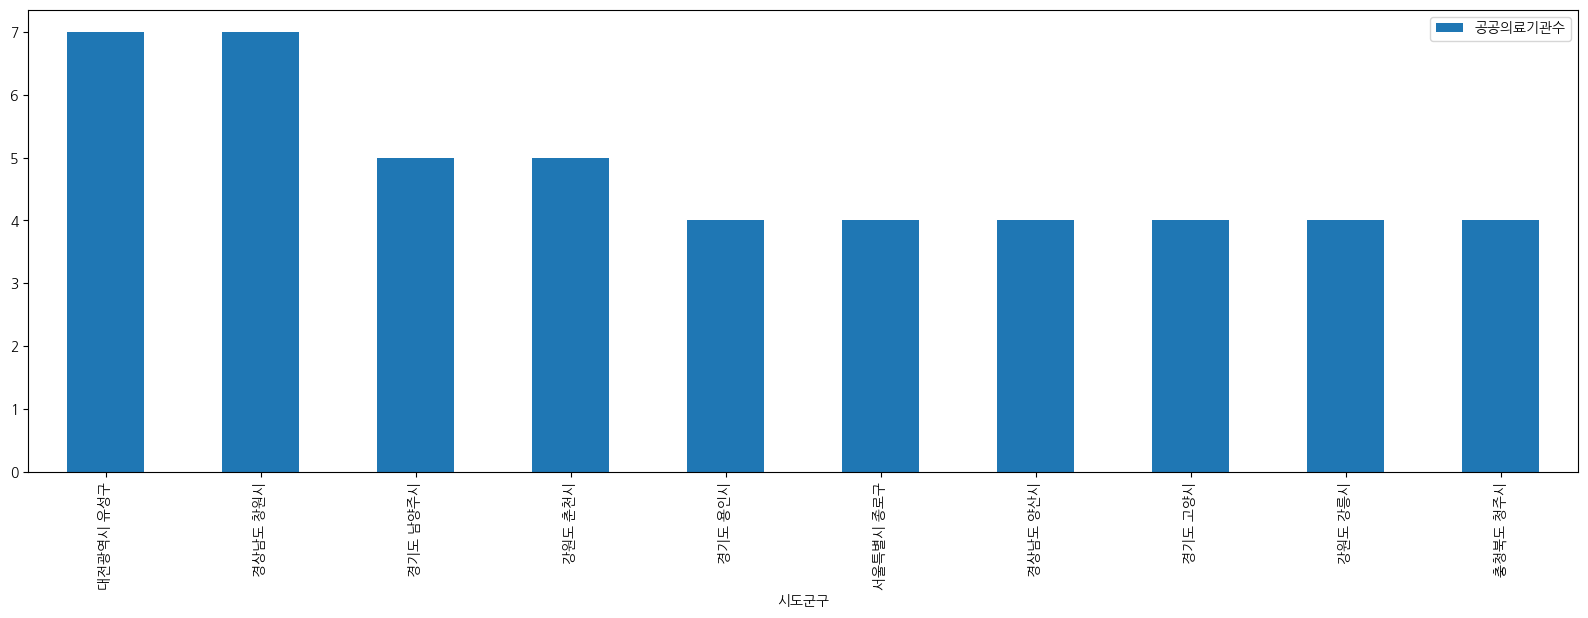

In [55]:
mc_ratio =	mc_ratio.sort_values('공공의료기관수',	ascending=False)
mc_ratio[:10].plot(kind='bar',	rot=90,	figsize=(20, 6))

<Axes: xlabel='시도군구'>

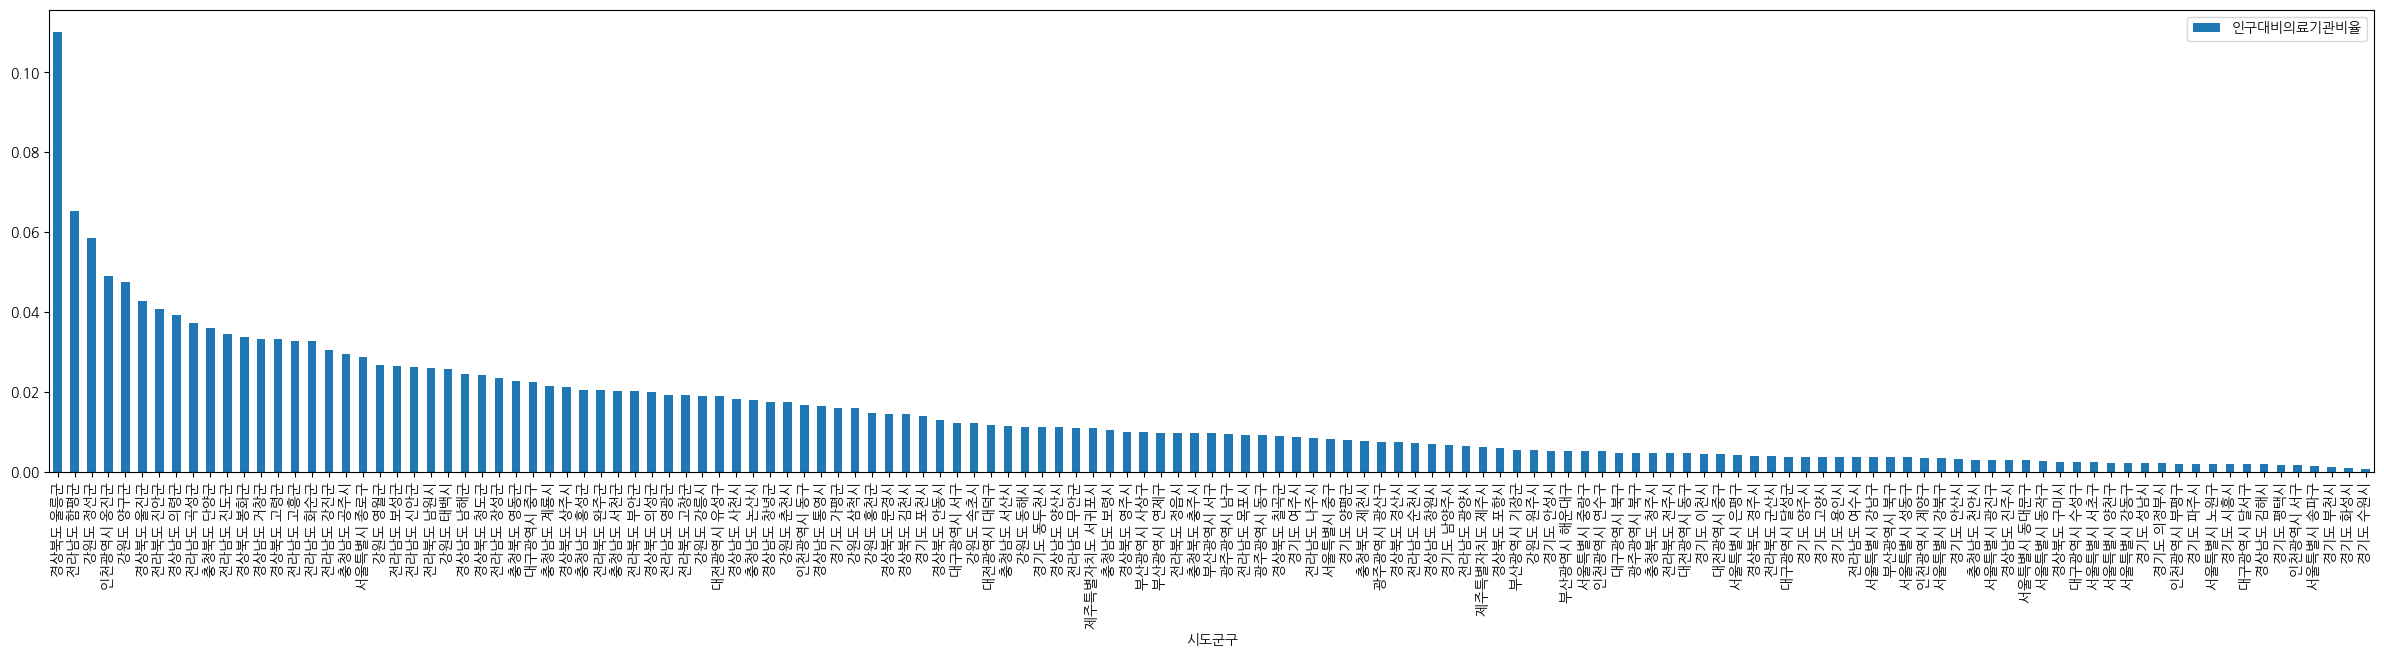

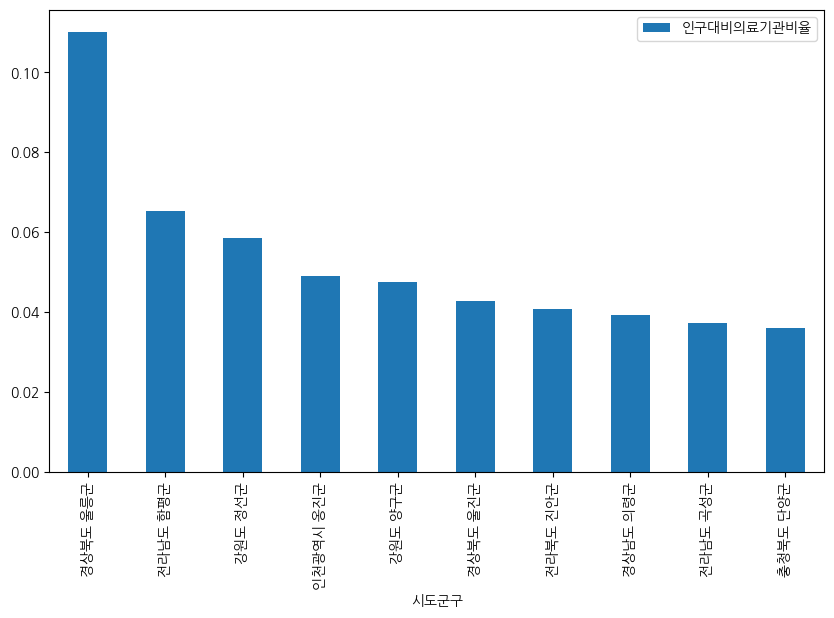

In [56]:
population_mc_rate =	local_medicalcenter_population[['인구대비의료기관비율']]
population_mc_rate =	population_mc_rate.sort_values('인구대비의료기관비율',	ascending	=	False)
population_mc_rate.plot(kind='bar',	rot=90,	figsize=(30,	6))
population_mc_rate[:10].plot(kind='bar',	rot=90,	figsize=(10,	6))